# Top Motifs

##  What is a motif?

A time series motif is a group of well conserved subsequences in a time series. The minimum of the matrix profile corresponds to the first motif pair. This algorithm exploits the Matrix Profile and MASS distance to find the nearest neighbor subsequences for the top motif pairs.

A great explanation is found in https://www.cs.ucr.edu/~eamonn/Matrix_Profile_Tutorial_Part1.pdf starting on slide 36.
## Load libraries

In [1]:
from matrixprofile import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

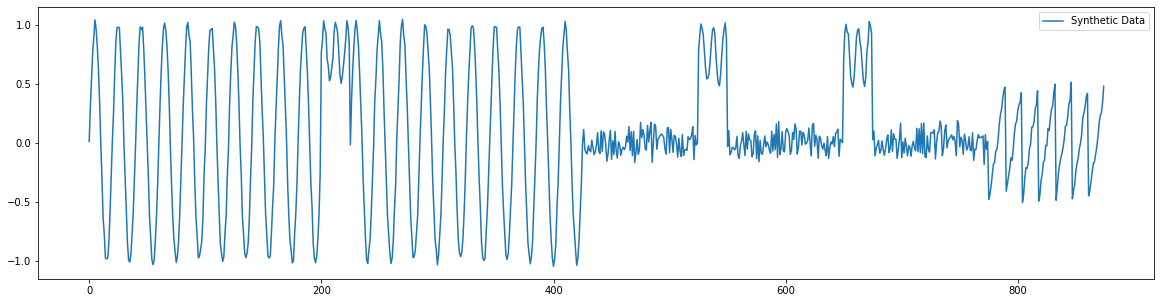

In [2]:
data = pd.read_csv('rawdata.csv')
pattern = data.data.values

#Plot data
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
legend = ax1.legend(loc='upper right')

## Calculate Matrix Profile and Motifs

In [3]:
m=32
mp = matrixProfile.stomp(pattern,m)

In [4]:
def plot_motifs(mtfs, labels, ax):

    colori = 0
    colors = 'rgbcm'
    for ms,l in zip(mtfs,labels):
        c =colors[colori % len(colors)]
        starts = list(ms)
        ends = [min(s + m,len(pattern)-1) for s in starts]
        ax.plot(starts, pattern[starts],  c +'o',  label=l)
        ax.plot(ends, pattern[ends],  c +'o', markerfacecolor='none')
        for nn in ms:
            ax.plot(range(nn,nn+m),pattern[nn:nn+m], c , linewidth=2)
        colori += 1

    ax.plot(pattern, 'k', linewidth=1, label="data")
    ax.legend()

## `motifs.motifs`

### Parameters

 * `max_motifs`: stop finding new motifs once we have max_motifs
 * `radius`: For each motif found, find neighbors that are within `radius*motif_mp` of the first. 
 * `n_neighbors`: number of neighbors from the first to find. If it is None, find all.  
 * `ex_zone`: minimum distance between indices for after each subsequence is identified. Defaults to m/2 where m is the subsequence length. If `ex_zone = 0`, only the found index is exclude, if `ex_zone = 1` then if `idx` is found as a motif `idx-1, idx, idx+1` are excluded.

### Returns
The function returns a tuple `(top_motifs, distances)` which are lists of the same length.

 * `top_motifs`: This is a list of the indices found for each motif. The first index is the nth motif followed by all nearest neighbors found sorted by distances. 
 * `distances`: Minimum Matrix profile value for each motif set.



In [5]:
mtfs ,motif_d  = motifs.motifs(pattern, mp, max_motifs=10)

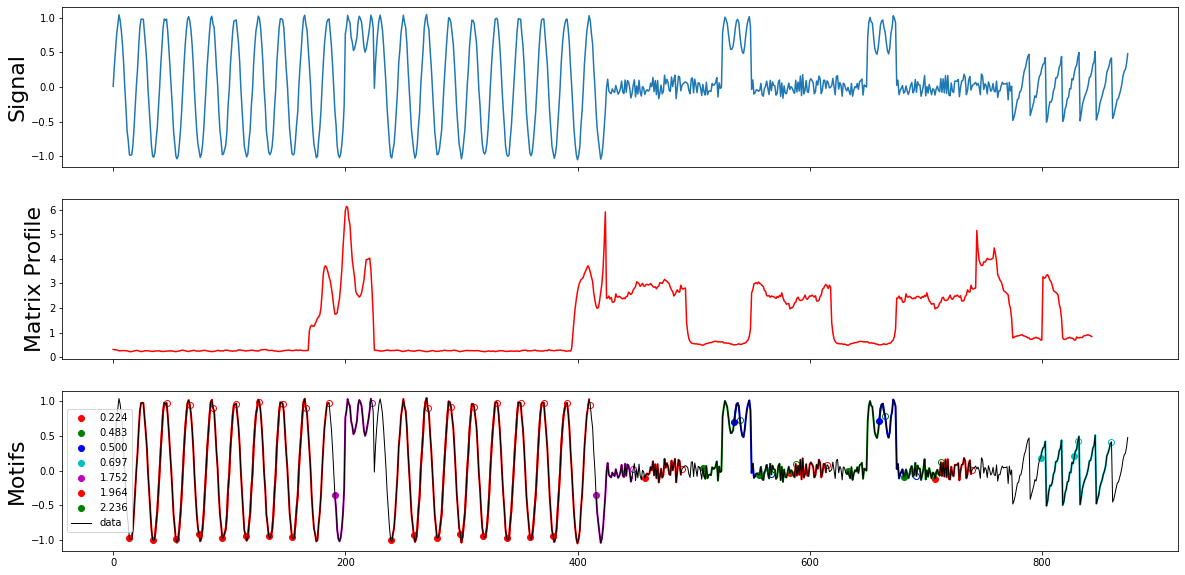

In [6]:
#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Signal', size=22)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)

#Plot the Motifs
plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax3)
ax3.set_ylabel('Motifs', size=22)
#plt.xlim((0,100))
plt.show()

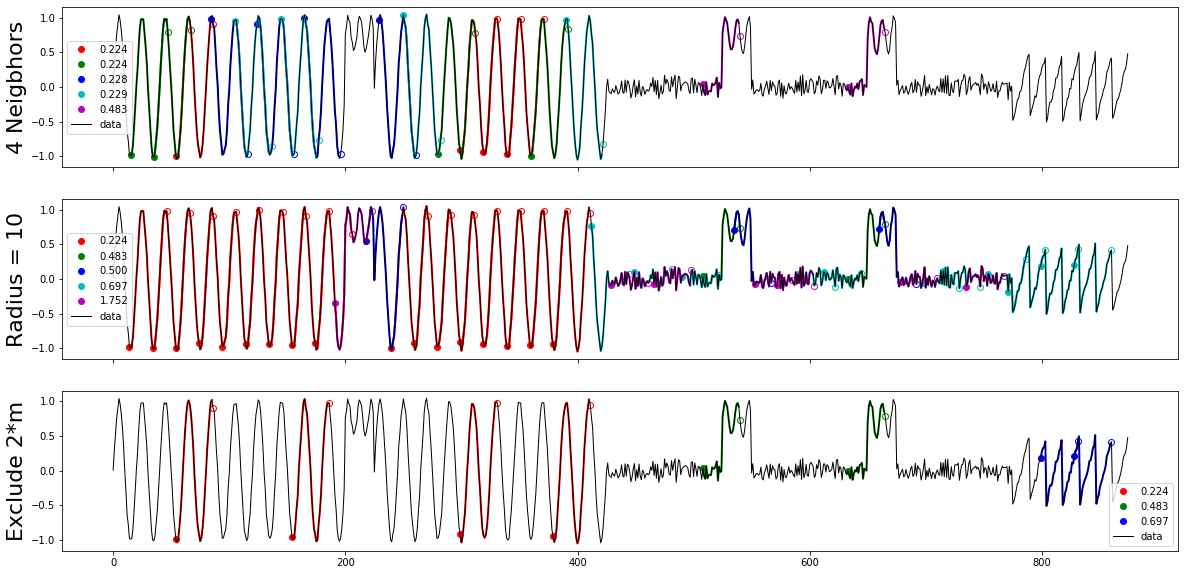

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))


mtfs ,motif_d  = motifs.motifs(pattern, mp, max_motifs=5, n_neighbors=4)
plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax1)
ax1.set_ylabel('4 Neigbhors', size=22)

mtfs ,motif_d  = motifs.motifs(pattern, mp, max_motifs=5, radius=10)
plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax2)
ax2.set_ylabel('Radius = 10', size=22)

mtfs ,motif_d  = motifs.motifs(pattern, mp, max_motifs=5, ex_zone=2*m)
plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax3)
ax3.set_ylabel('Exclude 2*m', size=22)
plt.show()